In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import cross_val_score

In [50]:
data = pd.read_csv('Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [52]:
corr_matrix=data.corr()
corr_matrix['LeaveOrNot'].sort_values(ascending=False)

C:\Users\power\AppData\Local\Temp\ipykernel_7720\2317458851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


LeaveOrNot                   1.000000
JoiningYear                  0.181705
ExperienceInCurrentDomain   -0.030504
Age                         -0.051126
PaymentTier                 -0.197638
Name: LeaveOrNot, dtype: float64

In [53]:
data.duplicated().sum()

1889

In [54]:
data = data.drop_duplicates()

In [55]:
data.shape

(2764, 9)

In [56]:
data['Education'].value_counts()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

In [57]:
data['JoiningYear'].value_counts().sort_values(ascending=False)

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64

In [58]:
data['City'].value_counts()

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

In [59]:
data['Age'].value_counts()

28    365
27    218
30    186
29    180
26    179
25    167
24    161
36    121
40    119
37    119
34    118
38    117
39    115
31    115
33    114
32    113
35    110
41     75
23     41
22     31
Name: Age, dtype: int64

In [60]:
data['Age'].mean()

30.952966714905934

In [61]:
data['LeaveOrNot'].value_counts()

0    1676
1    1088
Name: LeaveOrNot, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

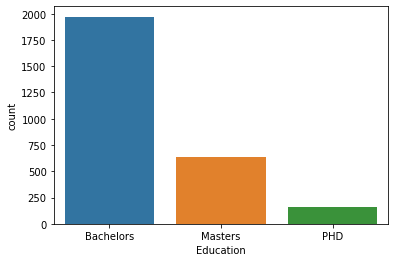

In [62]:
sns.countplot(data,x='Education')

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

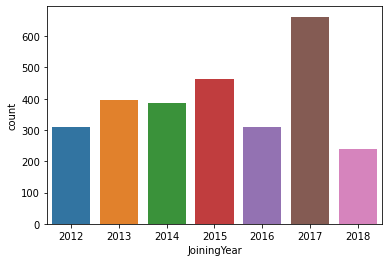

In [63]:
sns.countplot(data,x='JoiningYear')

<AxesSubplot:xlabel='City', ylabel='count'>

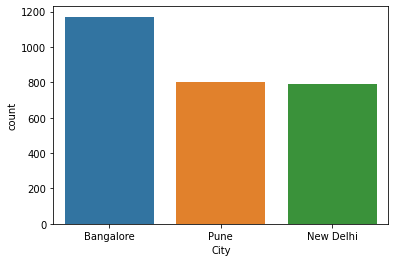

In [64]:
sns.countplot(data,x='City')

<AxesSubplot:xlabel='Age', ylabel='count'>

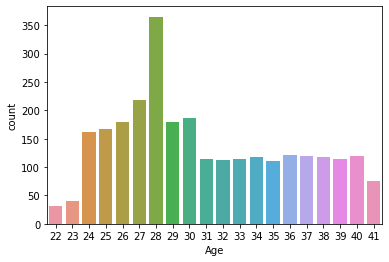

In [65]:
sns.countplot(data,x='Age')

<AxesSubplot:xlabel='Gender', ylabel='count'>

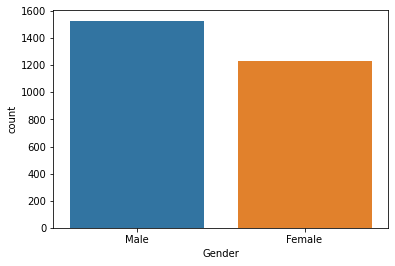

In [66]:
sns.countplot(data,x='Gender')

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

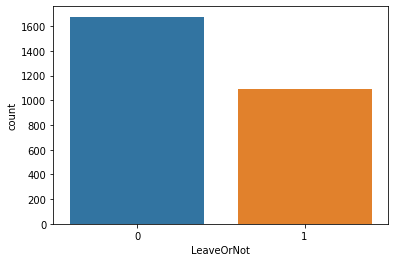

In [67]:
sns.countplot(data,x='LeaveOrNot')

array([[<AxesSubplot:title={'center':'JoiningYear'}>,
        <AxesSubplot:title={'center':'PaymentTier'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ExperienceInCurrentDomain'}>],
       [<AxesSubplot:title={'center':'LeaveOrNot'}>, <AxesSubplot:>]],
      dtype=object)

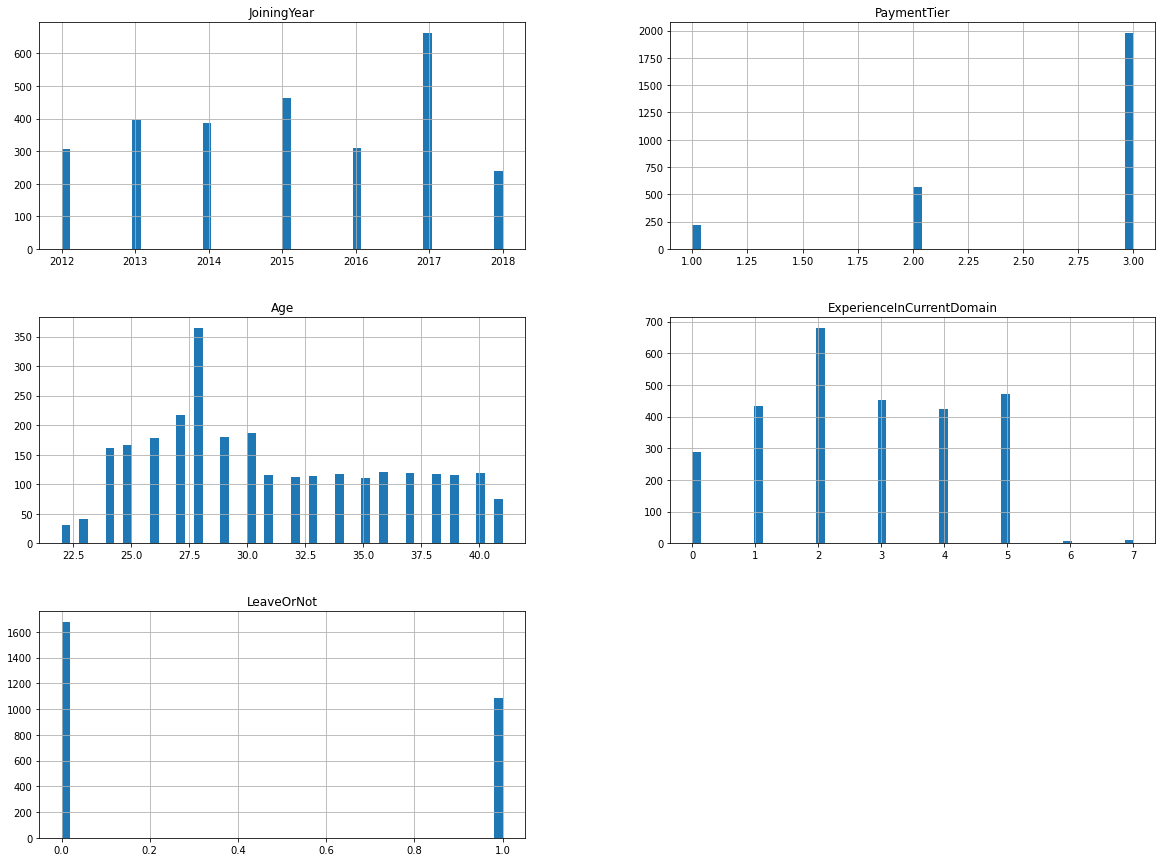

In [68]:
data.hist(bins=50,figsize=(20,15))

C:\Users\power\AppData\Local\Temp\ipykernel_7720\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot:>

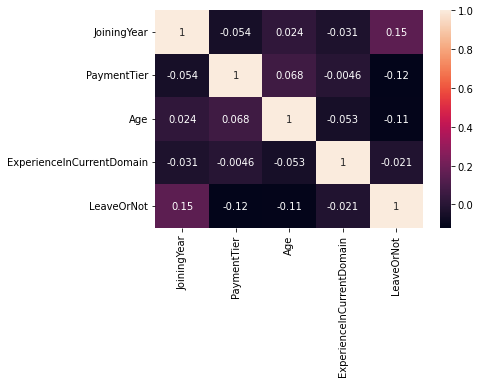

In [69]:
sns.heatmap(data.corr(),annot=True)

In [70]:
data['Gender']=data['Gender'].replace('Female',0)
data['Gender']=data['Gender'].replace('Male',1)

In [71]:
data['EverBenched']=data['EverBenched'].replace('No',0)
data['EverBenched']=data['EverBenched'].replace('Yes',1)
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,1,0,0,0
1,Bachelors,2013,Pune,1,28,0,0,3,1
2,Bachelors,2014,New Delhi,3,38,0,0,2,0
3,Masters,2016,Bangalore,3,27,1,0,5,1
4,Masters,2017,Pune,3,24,1,1,2,1


In [72]:
from sklearn.preprocessing import OneHotEncoder 
cat_encoder=OneHotEncoder() 
data_city_1hot = pd.get_dummies(data['City'])

In [73]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,1,0,0,0
1,Bachelors,2013,Pune,1,28,0,0,3,1
2,Bachelors,2014,New Delhi,3,38,0,0,2,0
3,Masters,2016,Bangalore,3,27,1,0,5,1
4,Masters,2017,Pune,3,24,1,1,2,1


In [74]:
data=data.drop('City',axis=1)
data=pd.concat([data,data_city_1hot],axis=1)

In [75]:
data.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune
0,Bachelors,2017,3,34,1,0,0,0,1,0,0
1,Bachelors,2013,1,28,0,0,3,1,0,0,1
2,Bachelors,2014,3,38,0,0,2,0,0,1,0
3,Masters,2016,3,27,1,0,5,1,1,0,0
4,Masters,2017,3,24,1,1,2,1,0,0,1


In [76]:
ord_cols_mapping=[{'col':'Education','mapping':{'Bachelors':1,'Masters':2,'PHD':'3'}}]

In [77]:
encoder=OrdinalEncoder(mapping=ord_cols_mapping)
data=encoder.fit_transform(data)

In [78]:
data.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune
0,1,2017,3,34,1,0,0,0,1,0,0
1,1,2013,1,28,0,0,3,1,0,0,1
2,1,2014,3,38,0,0,2,0,0,1,0
3,2,2016,3,27,1,0,5,1,1,0,0
4,2,2017,3,24,1,1,2,1,0,0,1


In [79]:
X = data.drop('LeaveOrNot',axis=1)
y=data['LeaveOrNot']

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42,max_depth=5,max_leaf_nodes=8)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8, random_state=42)

In [82]:
y_pred = dt.predict(X_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       556
           1       0.42      0.87      0.57       135

    accuracy                           0.74       691
   macro avg       0.69      0.79      0.69       691
weighted avg       0.85      0.74      0.77       691



In [84]:
confusion_matrix(y_pred,y_test)

array([[396, 160],
       [ 18, 117]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score
1-accuracy_score(y_pred,y_test)

0.2575976845151954

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':[2,3,4,5,6,7,8],'max_leaf_nodes':[5,6,7,8,9,10,11,12],'min_samples_split':[1,2,3,4,5]}

In [87]:
grid=GridSearchCV(dt,param_grid)

In [88]:
grid.fit(X_train,y_train)

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\bas

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8,
                                              random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [90]:
y_pred2=grid.predict(X_test)

In [91]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       554
           1       0.45      0.91      0.60       137

    accuracy                           0.76       691
   macro avg       0.71      0.81      0.71       691
weighted avg       0.87      0.76      0.78       691



In [94]:
confusion_matrix(y_pred2,y_test)

array([[401, 153],
       [ 13, 124]], dtype=int64)